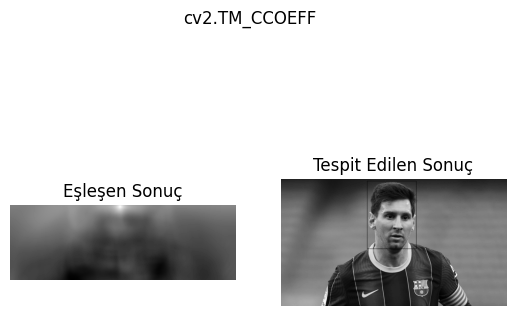

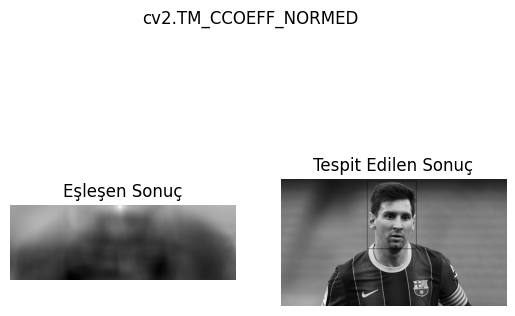

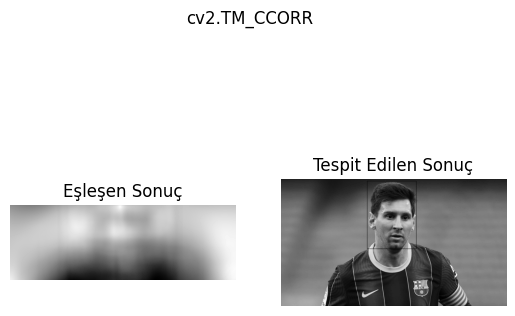

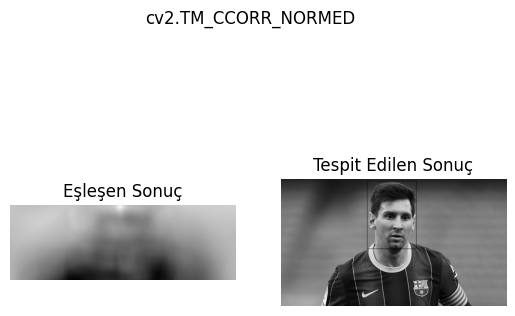

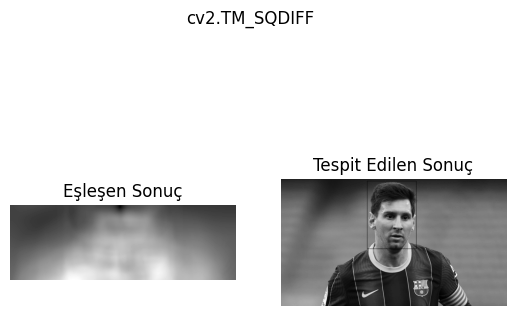

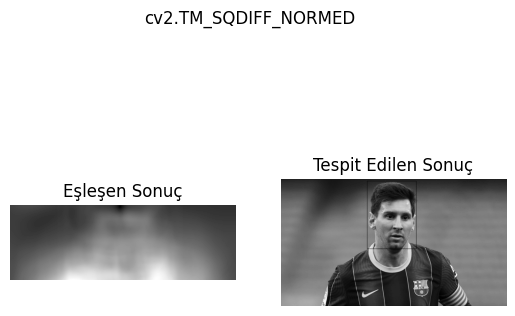

In [9]:
import cv2 #gerekli kütüphaneleri(paketleri) ekledik
import matplotlib.pyplot as plt 

main_img = cv2.imread('D:/examples_forDeepLearning/ObjectDeteciton/templateMatching/src/messi.jpg',0)  #main resmimizi ve templateimizi gri tonda yükledik
template = cv2.imread('D:/examples_forDeepLearning/ObjectDeteciton/templateMatching/src/messi_face.jpg',0)

h, w = template.shape #rectangle işlemi için templatemizin boyutların ihtiyacımız var

methods = ['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR','cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']  #methodalarımızı tanımladık

for meth in methods:  #tüm methodaları kullanmak için for döngüsü açtık
    method = eval(meth)  #eval string ifadeyi normal fonksiyona çeviriyor 
    res = cv2.matchTemplate(main_img,template,method)

    min_val,max_val,min_loc,max_loc = cv2.minMaxLoc(res) #eşleşen kısmın koordinatlarını aldık

    if method in [cv2.TM_SQDIFF,cv2.TM_SQDIFF_NORMED]:  #eğer ki methodumuz bi iki methottan biriyse eğer 
        top_left = min_loc  #çünkü diğerleri ile çıktıları farklı min loc bu iki method da sol üst köşeye denk geliyor
    else:
        top_left = max_loc  #diğer methodlard ise max loc değeri sol üst değere karşılık geliyor 

    bottom_right = (top_left[0] + w,top_left[1]+ h)  #eşleştirilen kısmı kutucuk içine almak için sağ alt köşesini belirledik

    cv2.rectangle(main_img,top_left,bottom_right,(0,255,0),2)  #eşleştirmenin somutlaşması için main üstüne etiket attık

    plt.figure()
    plt.subplot(121),plt.imshow(res,cmap="gray") #1 satır 2 sütün ve ilkini kullanıyoruz
    plt.title('Eşleşen Sonuç'),plt.axis("off")
    plt.subplot(122),plt.imshow(main_img,cmap="gray") #1 satır 2 sütun ikincisini kullanıyoruz
    plt.title('Tespit Edilen Sonuç'),plt.axis("off")
    plt.suptitle(meth)
    plt.show()
